In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

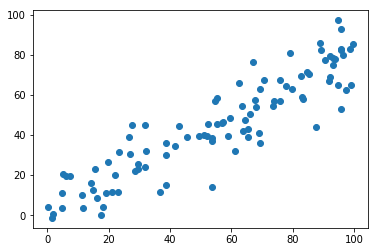

In [3]:
plt.scatter(X[:, 0], X[:, 1])

# demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

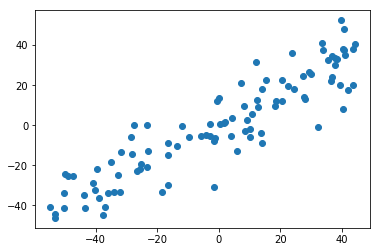

In [6]:
plt.scatter(X_demean[:,0], X_demean[:, 1])

In [7]:
np.mean(X_demean[:,1])

-4.121147867408581e-15

## 梯度上升法

In [8]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [9]:
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [10]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [11]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [12]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.09127857, 0.12556147])

In [13]:
eta = 0.01

In [14]:
w = gradient_ascent(df_debug, X_demean, initial_w, eta)

In [15]:
w

array([0.77281424, 0.6346323 ])

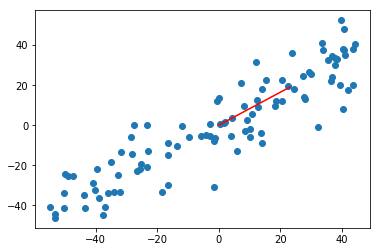

In [16]:
plt.scatter(X_demean[:, 0], X_demean[:,1])
plt.plot([0, w[0] *30], [0, w[1] * 30], color ='r')

# 获得前n个主成分

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

In [19]:
def demean(X):
    return X - np.mean(X, axis = 0)
X = demean(X)

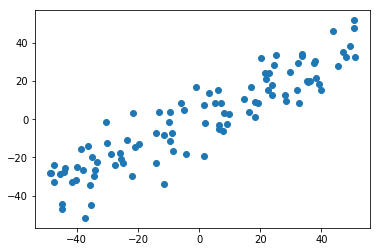

In [20]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [21]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

def direction(w):
    return w / np.linalg.norm(w)
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        
        cur_iter += 1
    return w


In [22]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.79199367, 0.6105293 ])

In [23]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

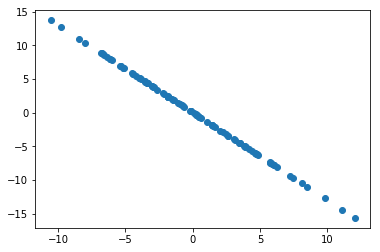

In [24]:
plt.scatter(X2[:, 0], X2[:, 1])

In [25]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.61053361, -0.79199035])

In [26]:
w.dot(w2)

5.444202583082536e-06

In [27]:
X2 = X - X.dot(w).reshape(-1, 1) * w

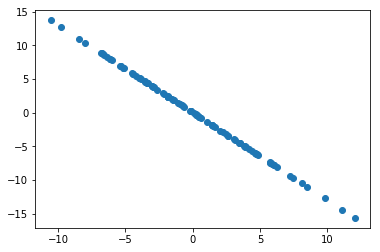

In [28]:
plt.scatter(X2[:, 0], X2[:, 1])

In [29]:
def first_n_components(n, X, eta = 0.01, n_iters = 1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [30]:
first_n_components(2, X)

[array([0.79199359, 0.61052941]), array([ 0.61053257, -0.79199115])]

## 从高维数据向地位数据的映射

In [31]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

In [32]:
from kNN.PCA import PCA
pca = PCA(n_components = 2)

In [33]:
pca.fit(X)

PCA(n_components=2)

In [34]:
pca.components_

array([[ 0.80035353,  0.59952834],
       [-0.59952577,  0.80035545]])

In [35]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components=1)

In [36]:
X_reduction = pca.transform(X)

In [37]:
X_reduction.shape

(100, 1)

In [38]:
X_restore = pca.inverse_transform(X_reduction)

In [39]:
X_restore.shape

(100, 2)

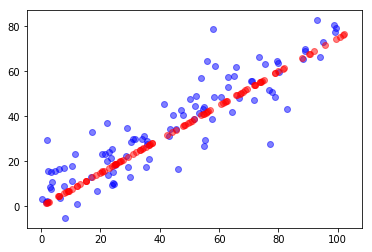

In [40]:
plt.scatter(X[:, 0], X[:, 1], color ='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha = 0.5)
plt.show()

# scikit-learn中的PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.components_

array([[0.80035359, 0.59952825]])

In [44]:
X_reduction = pca.transform(X)

In [45]:
X_reduction.shape

(100, 1)

In [46]:
X_restore = pca.inverse_transform(X_reduction)

In [47]:
X_restore.shape

(100, 2)

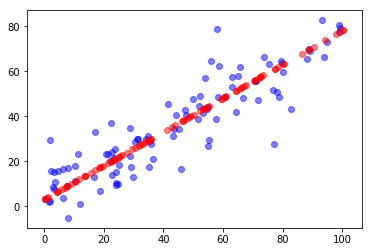

In [48]:
plt.scatter(X[:,0], X[:,1], color='b', alpha= 0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color ='r', alpha=0.5)
plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [50]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [52]:
X_train.shape

(1347, 64)

In [53]:
%%time

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 3.19 ms, sys: 947 µs, total: 4.14 ms
Wall time: 4.41 ms


In [54]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [56]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 8.75 ms, sys: 1.93 ms, total: 10.7 ms
Wall time: 10 ms


In [57]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

In [58]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [59]:
pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

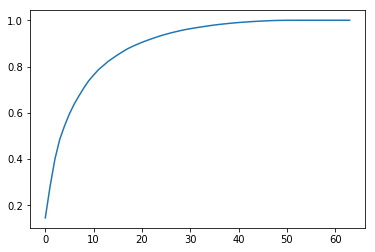

In [60]:
plt.plot([i for i in range(X_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i + 1]) for i in range(X_train.shape[1])])
plt.show()

In [61]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.n_components_

28

In [63]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [64]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 3.47 ms, sys: 1.01 ms, total: 4.49 ms
Wall time: 2.61 ms


In [65]:
knn_clf.score(X_test_reduction, y_test)

0.98

In [66]:
pca = PCA(n_components = 2)
pca.fit(X)
X_reduction = pca.transform(X)

In [67]:
X_reduction.shape

(1797, 2)

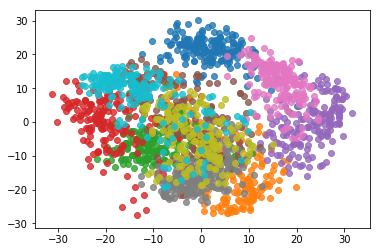

In [68]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i,1], alpha=0.8)
plt.show()